#                              Yelp review dataset analysis

In [11]:
## Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
import pandas as pd

In [12]:
## Modules for Data PreProcessing and text visualization
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
from textblob import TextBlob
from itertools import islice
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [13]:
## Importing necessary modelues for Model Building
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [14]:
file='/Users/ankit/Downloads/yelp_dataset/yelp_review_short.csv'

In [15]:
df= pd.read_csv(file)

In [16]:
df.head()

review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0      1       6      1     0   
1      5       0      0     0   
2      5       3      0     0   
3      5       0      0     0   
4      1       7      0     0   

                                                text                 date  
0  Total bill for this horrible service? Over $8G...  2013-05-07 04:34:36  
1  I *adore* Travis at the Hard Rock's new Kelly ...  2017-01-14 21:30:33  
2  I have to say that this office really has it t...  2016-11-09 20:09:03  
3  Went in for a lunch. Steak sandwich was delici...  2018-01-09 20:56:38  
4  Today was my second out of three sessions I ha...  2018-01-30 23:07:38

In [17]:
df.describe()

stars       useful         funny          cool
count  10000.000000  10000.00000  10000.000000  10000.000000
mean       3.716700      1.29820      0.458000      0.559000
std        1.471549      2.90264      1.557973      2.056682
min        1.000000      0.00000      0.000000      0.000000
25%        3.000000      0.00000      0.000000      0.000000
50%        4.000000      0.00000      0.000000      0.000000
75%        5.000000      1.00000      0.000000      0.000000
max        5.000000     91.00000     42.000000     86.000000

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
text           10000 non-null object
date           10000 non-null object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [19]:
df.dropna(inplace=True)

In [20]:
df.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [21]:
df['length'] = df['text'].apply(len)


In [22]:
df.head()

review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0      1       6      1     0   
1      5       0      0     0   
2      5       3      0     0   
3      5       0      0     0   
4      1       7      0     0   

                                                text                 date  \
0  Total bill for this horrible service? Over $8G...  2013-05-07 04:34:36   
1  I *adore* Travis at the Hard Rock's new Kelly ...  2017-01-14 21:30:33   
2  I have to say that this office really has it t...  2016-11-09 20:09:03   
3  Went in for a lunch. Steak sandwich was delici...  2018-01-09 20:56:38   
4  Today was my second out of three sessions I ha...  2018-01-30 23:07:38   

   length  
0     204  
1    1567  
2     615  
3     413  
4    3509

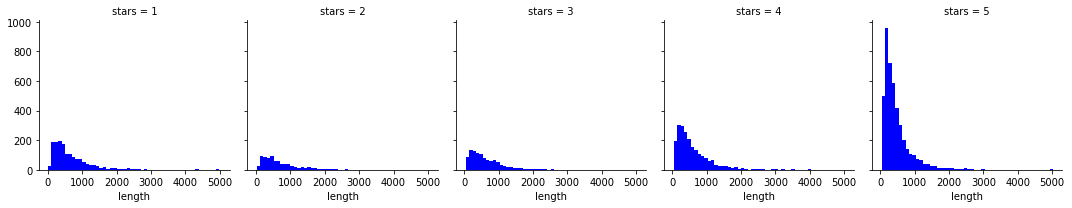

In [23]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

We can see the length of reviews was more for 5 stars.

In [24]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = df.groupby('stars').mean()
stval

useful     funny      cool      length
stars                                          
1      1.901897  0.576848  0.243950  711.079137
2      1.518750  0.655000  0.426250  730.323750
3      1.292523  0.514019  0.609346  681.386916
4      1.332568  0.562701  0.847037  623.055122
5      1.034132  0.316230  0.537975  470.524638

In [25]:
stval.corr()


useful     funny      cool    length
useful  1.000000  0.711053 -0.657042  0.777206
funny   0.711053  1.000000 -0.166384  0.932967
cool   -0.657042 -0.166384  1.000000 -0.354818
length  0.777206  0.932967 -0.354818  1.000000

Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

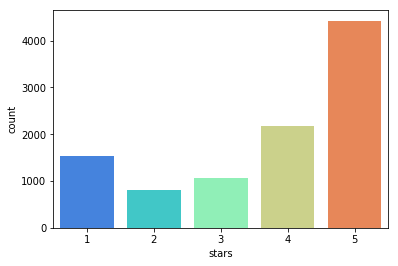

In [26]:
sns.countplot(x='stars',data=df,palette = 'rainbow')


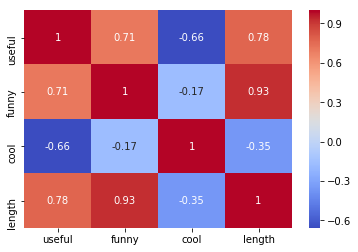

In [27]:
sns.heatmap(stval.corr(),cmap='coolwarm',annot=True)


Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.



In [28]:
yelp_class=df[(df['stars']==1)|(df['stars']==5)]
yelp_class.head()

review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0      1       6      1     0   
1      5       0      0     0   
2      5       3      0     0   
3      5       0      0     0   
4      1       7      0     0   

                                                text                 date  \
0  Total bill for this horrible service? Over $8G...  2013-05-07 04:34:36   
1  I *adore* Travis at the Hard Rock's new Kelly ...  2017-01-14 21:30:33   
2  I have to say that this office really has it t...  2016-11-09 20:09:03   
3  Went in for a lunch. Steak sandwich was delici...  2018-01-09 20:56:38   
4  Today was my second out of three sessions I ha...  2018-01-30 23:07:38   

   length  
0     204  
1    1567  
2     615  
3     413  
4    3509

Set the index with review_id

In [29]:
yelp_class.set_index('review_id')

user_id             business_id  stars  \
review_id                                                                       
Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg      1   
GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ      5   
2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw      5   
yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA      5   
11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ      1   
8e9HxxLjjqc9ez5ezzN7iQ  d6xvYpyzcfbF_AZ8vMB7QA  zvO-PJCpNk4fgAVUnExYAA      1   
-I5umRTkhw15RqpKMl_o1Q  -mA3-1mN4JIEkqOtdbNXCQ  mRUVMJkUGxrByzMQ2MuOpA      1   
JVcjMhlavKKn3UIt9p9OXA  TpyOT5E16YASd7EWjLQlrw  AakkkTuGZA2KBodKi2_u8A      1   
svK3nBU7Rk8VfGorlrN52A  NJlxGtouq06hhC7sS2ECYw  YvrylyuWgbP90RgMqZQVnQ      5   
rEITo90tpyKmEfNDp3Ou3A  6Fz_nus_OG4gar721OKgZA  6lj2BJ4tJeu7db5asGHQ4w      5   
Amo5gZBvCuPc_tZNpHwtsA  DzZ7piLBF-WsJxqosfJgtA  qx6WhZ42eDKmBchZDax4dQ      5   
IPw8yWiyqnfBzzWmypUHgg  5JVY32_bmTBfIGpCCsnAfw  Mem13A3C202RzT53npn4NA      5   
S337tATeouQJdoPYyir29w  2mxBNBeFrgDszqGS5tdEHA  d_L-rfS1vT3JMzgCUGtiow      5   
D_UvaenM25iNd6aehTZ0MA  8NwU4TRsD3S6gIfBqFzDMQ  Sfc8Haz2Yri8Mo1L0E0TsA      5   
I9HBDyzCqLhTYHCAZIFZQQ  vXZeHaLvdfCPATz5BDavow  FQ1wBQb3aNeRMThSQEV0Qg      5   
W1wbNaUnbMy4b9QqY3_SAg  vDr8hBNYigiY70fk1kF5iQ  hd5xm20tfSa70-6UqD9-bg      1   
qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw      5   
1daGBpea0sleayFeeXuoYw  q3GeSW9dWN9r_ocqFkhrvg  9nTF596jDvBBia2EXXiOOg      1   
DAC4zWY2ZMa1vxpN9RrDvA  yxyRt-zoh_A6PMThX-h9Vw  SNL64axQhCO6Z7ohcWg3wA      1   
0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug      5   
bjD0Dqn3k-fi00BXatrytg  1fi6x4tnJtlVWaJmoIO9XA  XTzKRvWciP_BZ9imk8mmPQ      1   
CelUWzp-GnJIiiV1mDUb-g  tFICmdLtwgFIRcwtlbYQOg  CDpoJiqgM04wqQTZ6QkTqQ      1   
hUUfzKeDLo930LA9-v2tWQ  uFVAAe0JC81IPmxgT49Hcw  3JxKzWquEbPC3yPIfoCiLw      5   
E6B-2U2sGG3xgmnNWZAEew  DbccYu3OppWKl21OanZnTg  YSUcHqlKMPHHJ_cTrqtNrA      1   
RLbWoIri29BcQ8yjzsvQLQ  _o740mSNRhMNYuPjSJoPLg  sMzNLdhJZGzYirIWt-fMAg      5   
vBRxlgkpDTXjWiYBp1V6GA  wNyiw6GfVfn5Kphqmux1gw  5OZlLXjU0FXUbrw8Scja6g      1   
eed44nI0eZ4BGKtKXsRJhQ  tAcB1ZohRtjozsymvqqHzQ  m7ommfJFalI47UksyX04Iw      1   
NqYSX93Amv4sd5pPPr3Gag  zFYFuufYWQSPj0r5lrKQKg  wJj1EwYcXHdvA9zKqmb5hQ      5   
j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw      5   
f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw      1   
...                                        ...                     ...    ...   
AbceaV-Un_yF0PwJaNYUQQ  w3bQVkvNNmPip0uyUUQTmg  yW9IIc1cBIlFlbOG_1pp_Q      5   
oO9U3VhsprN-f08NtVprDg  rIkrBCOdYnN46MT1GLZStw  XXgiclB5kjH38YD29pshvg      5   
fC41-sj0w7LEx23K4I3sAQ  NsyDv_NPPN3ICQBprOlqBw  YmOWkved7K8q3eXgf4NNnA      5   
nuWlsNUbvlg5jDzaW3CTkw  VSOV3BDJDeftVVg0wBG-qw  dua9DKkJSN-fRheoTaQexA      5   
Te2MlHHxLcAqL5fK_8RBMw  BzdJ_kRPQ27BViVcgCi-IQ  K49O6DtxT2hyjcJcpgNr-A      1   
4HD4Bq3xecY5y-4WEvBjDw  6iXtag80B_Ccgb16MYZ3CQ  wUKzaS1MHg94RGM6z8u9mw      5   
N8cz04NauKzOfJw885YnEA  Se63qrFB6TiNsrAnaxHkhw  nQPYSFpUPHrvlHImR-XbqA      5   
uvNxd_T6y8_1FOqK-9FPdg  GR-93c0v3PQh3pks4jNERQ  VMXl3Dm1Nwvgwo1PVYTXbg      5   
0oKCnvNsWUrr39eFhO540A  GcSyxYcRTcgJBbk3W4G0sw  EAs61Wm1O6tLjCs8t2eP-Q      5   
vt15sIYI4l6izTYCIXYXog  q8pmzCDH48Nacibowi85TA  faPVqws-x-5k2CQKDNtHxw      5   
CX77JmILKKFTe5DLl8hHLA  nHc2XXcOLpeUH_mkgUeWDQ  XhUec_6-kgPy1_ZYUrzvPQ      5   
2gTcwJ8yMD0uLenRm9mvBg  CG-oUO4PoE0OiLzc90nicg  QqJFnv7q3b2VSSvqlUr4Cg      5   
bo3oprc_VjmUrjIBsX5LAg  X49waIz4kJJeu1Gu4lvGwA  mfVrZNl4HHc8sxTl8rjztg      1   
F5XXd8eyqrHPiXQ3WA5qzg  sJ_3mQYp6kcx8aI7eovO7Q  4ritTGFnNxmKnKm-UX3kPQ      5   
vSL2AhlVIYZkFrUooxL_Vw  dipVxaat-2-XN3OHWcZjmg  77h11eWv6HKJAgojLx8G4w      5   
CcC-KRpwFpnqCydR-R20LA  PYnnzS_3-0oDAT3cmcfs9Q  FRfB3ZCY2szqp9ETT0tfjg      5   
CKhUQeyb8zbgQAnkRG_NxA  ZUVHNrHuJQVXmjyOPkofnA  SVhM3Pxjw-PUPr1sBghqlw

In [30]:
business=df.business_id.unique()

In [22]:
business.shape

(4618,)

So their are total of 4618 bussiness reviewed in the above dataset.

## Sentiment Analysis consists of two parts; Subjectivity and Polarity. Simply, Polarity and Subjectivity can be explained as follows:
Polarity — It simply means emotions expressed in a sentence, across a range of negative, to positive.
Subjectivity — Subjective sentence expresses some personal feelings, views, or beliefs.

In [23]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df_new = pd.DataFrame(columns=COLS)


In [24]:
for index, row in islice(df.iterrows(), 0, None):

    new_entry = []
    text_lower=(row['text'].lower())
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [row['date'],text_lower,sentiment,subjectivity,polarity]
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df_new = df_new.append(single_survey_sentimet_df, ignore_index=True)
df_new.to_csv('Yelp_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [25]:
df_new.shape

(10000, 5)

In [26]:
df_new.head()

date                                               text  \
0  2013-05-07 04:34:36  total bill for this horrible service? over $8g...   
1  2017-01-14 21:30:33  i *adore* travis at the hard rock's new kelly ...   
2  2016-11-09 20:09:03  i have to say that this office really has it t...   
3  2018-01-09 20:56:38  went in for a lunch. steak sandwich was delici...   
4  2018-01-30 23:07:38  today was my second out of three sessions i ha...   

                                    sentiment  subjectivity  polarity  
0   (-0.3333333333333333, 0.6166666666666667)      0.616667 -0.333333  
1    (0.3158096408096408, 0.5366678366678367)      0.536668  0.315810  
2              (0.429125, 0.5840000000000001)      0.584000  0.429125  
3                 (0.8324999999999999, 0.885)      0.885000  0.832500  
4  (0.04927662037037037, 0.43240740740740735)      0.432407  0.049277

In [27]:
df_new.describe()

subjectivity      polarity
count  10000.000000  10000.000000
mean       0.556653      0.237336
std        0.136217      0.231866
min        0.000000     -1.000000
25%        0.479207      0.100106
50%        0.555021      0.238889
75%        0.635556      0.377350
max        1.000000      1.000000

So my program has confirmed to me that all the 10000 records are there and gave me a mean polarity of 0.24, which is good that means as an average, most people are in between neutral to positive with the services.
And as you can see the 50% Value which means the median is above zero i.e., 0.24. 

Text(0, 0.5, 'Range')

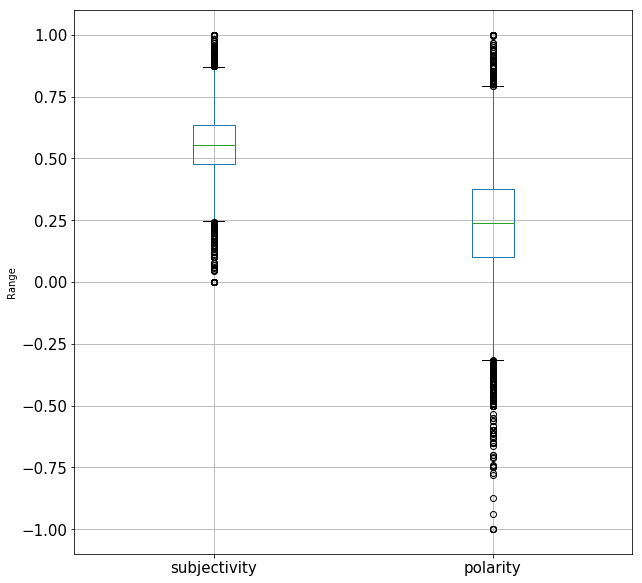

In [28]:
#boxplot for df_new

boxplot = df_new.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

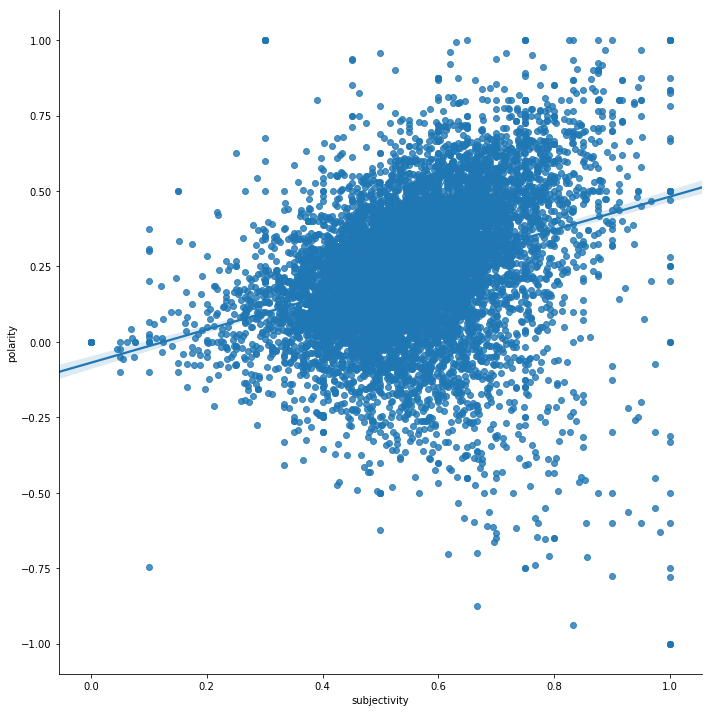

In [29]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=df_new,fit_reg=True,scatter=True, height=10,palette="mute") 


The scatter diagram is used to find the covariance and correlation between two variables. This diagram helps you determine how closely the two variables are related. After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.

In [30]:
#covariance and correlation for df_new
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_new['subjectivity']
data2 = data1 + df_new['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.018555   0.02876936]
 [0.02876936 0.09274557]]
Pearsons correlation: 0.69351


The covariance between the two variables is 0.0287693. We can see that it is positive, suggesting the variables change in the same direction as we expect.

We can see that the two variables are positively correlated and that the correlation is 0.69351. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

### The plot shows a positive correlation between Subjectivity and Polarity.
Meaning, as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.

In [31]:
a=df.text[0]

In [32]:
stopwords_1 = set(STOPWORDS)
stopwords_1.update(["alway","told","us","back","really","great","said","go","way","still","","Total","will","come","much","think","good", "food", "got", "get","came","even","ordered","well","place","one"])

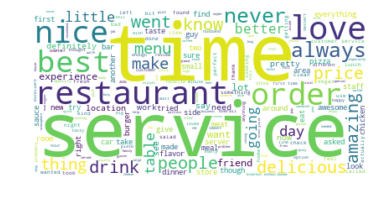

In [33]:
text1="".join(review for review in df.text)
wordcloud=WordCloud(stopwords=stopwords_1,background_color="white").generate(text=text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can see that most common theme was Service, Timings, Table service, Drinks more than food,location and in the food section it was pizza and burger.

## Data Preprocessing

In [34]:
#remove html
def remove_html(text):
    soup= BeautifulSoup(text,'lxml')
    htmlfree= soup.gettext()
    return htmlfree

In [35]:
# remove punctuation
def remove_punctuation(text):
    no_punctuation= "".join([w for w in text if w not in string.punctuation])
    return no_punctuation

### Remove punctuation and convert to lower case

In [36]:
yelp_class['text']=yelp_class['text'].apply(lambda x: remove_punctuation(x).lower())

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
def tokenize(text):
    return text.split()

In [38]:
#yelp_class.text.apply(tokenize)
def remove_stopwords(text):
    text=tokenize(text)
    words= [x for x in text if x not in stopwords.words('english')]
    return " ".join(words)
remove_stopwords("i ador travi at the hard rock new kelli")

'ador travi hard rock new kelli'

In [39]:
yelp_class.head()
print(yelp_class.shape)

(5953, 10)


#### Now we will perform tokenization for the purpose of stemming and lemmenting

tokenizer= RegexpTokenizer('\w+')st
yelp_class['text']=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))

In [40]:
import re
def replace_non_english(text):
    token_words=tokenize(text)
    words=[]
    for word in token_words:
        if re.search("[^a-z]", word) is None:
            words.append(word)
    return " ".join(words)
print(replace_non_english("this is 100"))                

this is


In [41]:
# tokenizing using split
lemmatizer= WordNetLemmatizer()


In [42]:
porter= PorterStemmer()

In [43]:
def stemSentence(sentence):
    token_words=tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

In [44]:
stemSentence("horrible service")


'horribl servic'

In [45]:
def lemmatize(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(lemmatizer.lemmatize(word))
    return " ".join(tokenized_words)

lemmatize("i am a dogs")

'i am a dog'

In [46]:
yelp_class.text = yelp_class.text.apply(remove_stopwords)

/Users/ankit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
yelp_class.text = yelp_class.text.apply(replace_non_english)


In [48]:
yelp_class.text = yelp_class.text.apply(lemmatize)


In [49]:
yelp_class.text = yelp_class.text.apply(stemSentence)

In [50]:
type(yelp_class.text)

pandas.core.series.Series

In [51]:
yelp_class['text'].head()

0    total bill horribl servic crook actual nerv ch...
1    ador travi hard rock new kelli cardena salon i...
2    say offic realli togeth organ friendli dr j ph...
3    went lunch steak sandwich delici caesar salad ...
4    today second three session paid although first...
Name: text, dtype: object

In [52]:
yelp_class.head()

review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0      1       6      1     0   
1      5       0      0     0   
2      5       3      0     0   
3      5       0      0     0   
4      1       7      0     0   

                                                text                 date  \
0  total bill horribl servic crook actual nerv ch...  2013-05-07 04:34:36   
1  ador travi hard rock new kelli cardena salon i...  2017-01-14 21:30:33   
2  say offic realli togeth organ friendli dr j ph...  2016-11-09 20:09:03   
3  went lunch steak sandwich delici caesar salad ...  2018-01-09 20:56:38   
4  today second three session paid although first...  2018-01-30 23:07:38   

   length  
0     204  
1    1567  
2     615  
3     413  
4    3509

## Unigram and Bigram frequency distributions

In [53]:
def frequency(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(word)
    return (tokenized_words)

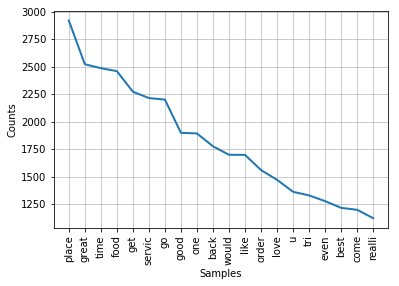

In [54]:
freq_text = yelp_class.text.apply(frequency)
total=[]
for i in freq_text:
    total+=i
freqdist = nltk.FreqDist(total)
freqdist.plot(20,cumulative=False)

In [55]:
freqdist.most_common(20)

[('place', 2921),
 ('great', 2523),
 ('time', 2487),
 ('food', 2460),
 ('get', 2273),
 ('servic', 2215),
 ('go', 2201),
 ('good', 1899),
 ('one', 1893),
 ('back', 1776),
 ('would', 1699),
 ('like', 1698),
 ('order', 1560),
 ('love', 1471),
 ('u', 1362),
 ('tri', 1329),
 ('even', 1277),
 ('best', 1216),
 ('come', 1198),
 ('realli', 1122)]

## Features affecting the positive reviews

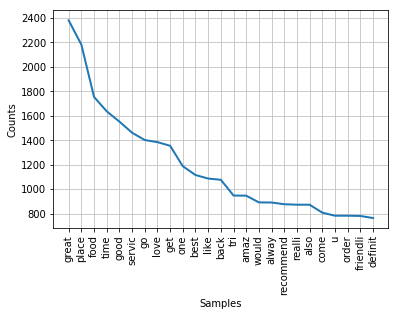

In [56]:
positive_reviews=yelp_class[yelp_class.stars==5]
negative_reviews=yelp_class[yelp_class.stars==1]
positive_freq_text = positive_reviews.text.apply(frequency)

total_pos=[]
for i in positive_freq_text:
    total_pos+=i
freqdist = nltk.FreqDist(total_pos)
freqdist.plot(25,cumulative=False)


## Features affecting the negative reviews

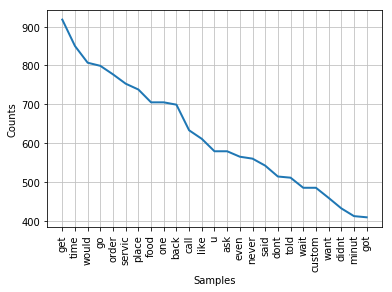

In [57]:
negative_freq_text = negative_reviews.text.apply(frequency)
total_neg=[]
for i in negative_freq_text:
    total_neg+=i
freqdist = nltk.FreqDist(total_neg)
freqdist.plot(25,cumulative=False)

In [58]:
bigram_total = list(nltk.bigrams(total))
print(list(bigram_total)[:10])
bigram_pos = list(nltk.bigrams(total_pos))
print(list(bigram_pos)[:10])

bigram_neg = list(nltk.bigrams(total_neg))
print(list(bigram_neg)[:10])


[('total', 'bill'), ('bill', 'horribl'), ('horribl', 'servic'), ('servic', 'crook'), ('crook', 'actual'), ('actual', 'nerv'), ('nerv', 'charg'), ('charg', 'u'), ('u', 'pill'), ('pill', 'check')]
[('ador', 'travi'), ('travi', 'hard'), ('hard', 'rock'), ('rock', 'new'), ('new', 'kelli'), ('kelli', 'cardena'), ('cardena', 'salon'), ('salon', 'im'), ('im', 'alway'), ('alway', 'fan')]
[('total', 'bill'), ('bill', 'horribl'), ('horribl', 'servic'), ('servic', 'crook'), ('crook', 'actual'), ('actual', 'nerv'), ('nerv', 'charg'), ('charg', 'u'), ('u', 'pill'), ('pill', 'check')]


In [59]:
print(bigram_total[:20])


[('total', 'bill'), ('bill', 'horribl'), ('horribl', 'servic'), ('servic', 'crook'), ('crook', 'actual'), ('actual', 'nerv'), ('nerv', 'charg'), ('charg', 'u'), ('u', 'pill'), ('pill', 'check'), ('check', 'onlin'), ('onlin', 'pill'), ('pill', 'cent'), ('cent', 'avoid'), ('avoid', 'hospit'), ('hospit', 'er'), ('er', 'cost'), ('cost', 'ador'), ('ador', 'travi'), ('travi', 'hard')]


In [60]:
b=bigram_total
c=bigram_pos
d=bigram_neg
res = [' '.join(b[0])]
print(res)                
bigram_total = [' '.join(tups) for tups in b]
print(bigram_total[:10])
bigram_pos = [' '.join(tups) for tups in c]
print(len(bigram_pos[:10]))
bigram_neg = [' '.join(tups) for tups in d]

['total bill']
['total bill', 'bill horribl', 'horribl servic', 'servic crook', 'crook actual', 'actual nerv', 'nerv charg', 'charg u', 'u pill', 'pill check']
10


## Counting bigram frequencies for total, positive and negative reviews separatley:

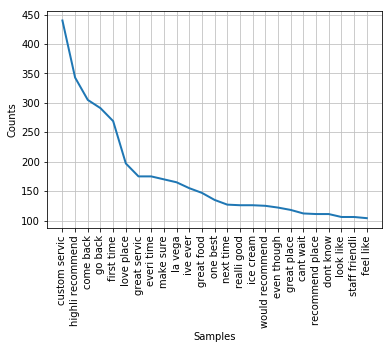

In [61]:

freqdist_bi_total = nltk.FreqDist(bigram_total)
freqdist_bi_total.plot(25,cumulative=False)

## Positive bigrams

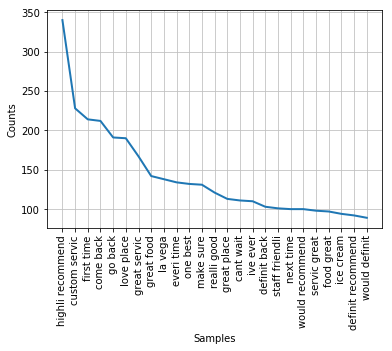

In [62]:
freqdist_bi_pos = nltk.FreqDist(bigram_pos)
freqdist_bi_pos.plot(25,cumulative=False)

## Negative bigrams

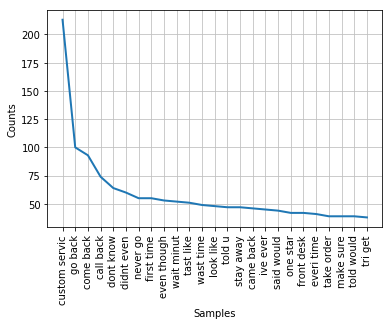

In [63]:
freqdist_bi_neg = nltk.FreqDist(bigram_neg)
freqdist_bi_neg.plot(25,cumulative=False)

## CountVectorizer for text classification


In order to train our model we need to assign numbers to our words which are present in the reviews.Their are many ways to do this:

Bag of words: but that would be inefficient, all words have same importance, no semantic information is preserved.

Countervector: It can be used here as it counts the number of words used and the number of features depends on it. This converts our text features into numbers which helps in the model preparation.

Tfidf: Uncommon words are given more importance than the common words.

As countervector gives a discrete value of number of counts so multinomialNB should perform better for this counter.


In [64]:

# Create a series to store the labels: y
y = yelp_class.stars.values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(yelp_class["text"],y,test_size=0.33,random_state=53)


In [65]:

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(max_df=0.5)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aaa', 'aargosi', 'aaron', 'aback', 'abandon', 'abbey', 'abbi', 'abd', 'abel', 'abid']


In [66]:
cv1=CountVectorizer()
text=["The fox is the not fox","The dog","The fox"]
x_train= cv1.fit_transform(text)
x=cv1.vocabulary_
for w, y in (x.items()):
    print(w, y)
len(x)    

the 4
fox 1
is 2
not 3
dog 0


5

In [67]:
print(len(count_vectorizer.vocabulary_))

12440


## TfidfVectorizer for text classification


Bernoulli NB is good for making prediction if the features are in a binary form.
Gaussian NB is good if the features are normally distributed.

As many of the common words like "are", "the" etc dominate our model hence we can use tfidf vectorizer which stands for Term frequency inverse document frequency.

Tfidf= Term Frequency* Inverse Document Frequency
where, term frequency= number of occurence of the word in the document/ number of words in the document
       inverse document frequency= log(no. of documents/no. of documents containing the words)

In [68]:

tf= TfidfVectorizer(max_df=0.5)
tf_train=tf.fit_transform(X_train)
tf_test= tf.transform(X_test)

In [69]:

# Print the first 10 features
print(tf.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tf_train.A[50:5])

['aaa', 'aargosi', 'aaron', 'aback', 'abandon', 'abbey', 'abbi', 'abd', 'abel', 'abid']
[]


In [70]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [71]:
tfidf_df = pd.DataFrame(tf_train.A, columns=tf.get_feature_names())

## Training and testing a classification model with scikit-learn


In [72]:

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.9318066157760814
[[ 427   79]
 [  55 1404]]


### TfidfVectorizer

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb_classifier_1 = MultinomialNB()

nb_classifier_1.fit(tf_train, y_train)
# Create the predicted tags: pred
pred_1 = nb_classifier_1.predict(tf_test)
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_1)
print("The accuracy score using MultinomialNB with tfidf:"+ str(score))
#Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_1)
print("The confusion matrix using MultinomialNB with tfidf:")
print(cm)


The accuracy score using MultinomialNB with tfidf:0.7786259541984732
The confusion matrix using MultinomialNB with tfidf:
[[  72  434]
 [   1 1458]]


We see that the accuracy reduced as tfidf reduces the unwanted features which are not important for model building.

In [74]:
alphas = np.arange(0, 1, .1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tf_train, y_train)
    pred = nb_classifier.predict(tf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.8631043256997456

Alpha:  0.1
Score:  0.9251908396946565

Alpha:  0.2
Score:  0.9089058524173028

Alpha:  0.30000000000000004
Score:  0.8941475826972011

Alpha:  0.4
Score:  0.8804071246819338

Alpha:  0.5
Score:  0.8549618320610687

Alpha:  0.6000000000000001
Score:  0.8381679389312977

Alpha:  0.7000000000000001
Score:  0.8208651399491094

Alpha:  0.8
Score:  0.8045801526717558

Alpha:  0.9
Score:  0.7913486005089059



/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                     ('sgd',SGDClassifier())])
params = {'tfidf__use_idf':(False,True)}
gridsearch = GridSearchCV(pipeline,params)
gridsearch.fit(X_train,y_train)
print(gridsearch.best_params_)

/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'tfidf__use_idf': False}


## We got the best accuracy at alpha=0.1

### N gram Vectorization

N grams are continous sequences of n-items in a sentence. N can be 1,2, or any positive number. Using this medthod the model can store more context.

In [76]:
#bigrams
cv_n = CountVectorizer(ngram_range=(1,2)) # (1,2) will use both 1 and 2 

In [77]:
# Transform the training data using only the 'text' column values: count_train 
bigram_train = cv_n.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
bigram_test = cv_n.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(cv_n.get_feature_names()[:10])

['aaa', 'aaa fantast', 'aaa insur', 'aaa took', 'aaa updat', 'aaa went', 'aargosi', 'aargosi owner', 'aaron', 'aaron abl']


In [78]:
bigram_df = pd.DataFrame(bigram_train.A, columns=cv_n.get_feature_names())
print(bigram_df.head())

   aaa  aaa fantast  aaa insur  aaa took  aaa updat  aaa went  aargosi  \
0    0            0          0         0          0         0        0   
1    0            0          0         0          0         0        0   
2    0            0          0         0          0         0        0   
3    0            0          0         0          0         0        0   
4    0            0          0         0          0         0        0   

   aargosi owner  aaron  aaron abl  ...  zoo like  zoo pet  zoo test  \
0              0      0          0  ...         0        0         0   
1              0      0          0  ...         0        0         0   
2              0      0          0  ...         0        0         0   
3              0      0          0  ...         0        0         0   
4              0      0          0  ...         0        0         0   

   zucchini  zucchini ad  zucchini asparagu  zucchini chip  zucchini flower  \
0         0            0                  0

In [79]:
nb_classifier_2= MultinomialNB(alpha=0.1)
nb_classifier_2.fit(bigram_train, y_train)

# Create the predicted tags: pred
pred_2 = nb_classifier_2.predict(bigram_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_2)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_2)
print(cm)


0.9475826972010178
[[ 436   70]
 [  33 1426]]


The accuracy using bigrams comes to 94.7%

### Word Embedding techniques

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Now, as before, we import the tokenizer and the pad sequences. We'll create an instance of tokenizer, giving it our vocab size and our desired out of vocabulary token. We'll now fit the tokenizer on our training set of data. Once we have our word index, we can now replace the strings containing the words with the token value we created for them. This will be the list called sequences. As before, the sentences will have variant length. So we'll pad and or truncate the sequenced sentences until they're all the same length, determined by the maxlength parameter. Then we'll do the same for the testing sequences. Note that the word index is words that are derived from the training set, so you should expect to see a lot more out of vocabulary tokens in the test exam. Now it's time to define our neural network. 

In [81]:
import tensorflow as tf

first we will split the data into training and testing using sklearn.

In [82]:
type(yelp_class.stars)

pandas.core.series.Series

In [83]:
#HYPERPARAMETERS FOR WORD EMBEDDING
max_length=120
embedding_dim=100
t=Tokenizer(filters='', oov_token="OOV")
print("splitting")
X_train,X_test,y_train,y_test=train_test_split(np.array(yelp_class.text),np.array(yelp_class.stars==5, dtype=int),test_size=0.1,random_state=53)
t.fit_on_texts(X_train)
word_index= t.word_index
training_sequences= t.texts_to_sequences(X_train)
padded= pad_sequences(training_sequences,maxlen=max_length)
testing_sequences=t.texts_to_sequences(X_test)
testing_paded=pad_sequences(testing_sequences,maxlen=max_length)
vocab_size = len(t.word_index)+1
print(len(training_sequences))
print(len(testing_sequences))
print(vocab_size)


splitting
5357
596
14380


Now we will create a neural network:

In [84]:
print(type(y_train))
print(type(y_test))
print(type(X_test))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Training a neaural network with and without word embedding

In [85]:
model= tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length),
                            tf.keras.layers.Conv1D(128, 5, activation='relu'),
                            tf.keras.layers.GlobalMaxPooling1D(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          1438000   
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,535,409
Trainable params: 1,535,409
Non-trainable params: 0
_________________________________________________________________


In [87]:
print(type(padded))
print(type(testing_paded))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded, y_train, validation_data=(testing_paded, y_test), epochs=5)


Train on 5357 samples, validate on 596 samples
Epoch 1/5
5357/5357 [==============================] - 15s 3ms/sample - loss: 0.3852 - accuracy: 0.8273 - val_loss: 0.1804 - val_accuracy: 0.9279
Epoch 2/5
5357/5357 [==============================] - 12s 2ms/sample - loss: 0.0949 - accuracy: 0.9664 - val_loss: 0.1931 - val_accuracy: 0.9379
Epoch 3/5
5357/5357 [==============================] - 12s 2ms/sample - loss: 0.0157 - accuracy: 0.9965 - val_loss: 0.2310 - val_accuracy: 0.9329
Epoch 4/5
5357/5357 [==============================] - 12s 2ms/sample - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.2320 - val_accuracy: 0.9413
Epoch 5/5
5357/5357 [==============================] - 12s 2ms/sample - loss: 5.5136e-04 - accuracy: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9396


In [89]:
#!pip install keras

In [90]:
embedding_dim = 100


In [91]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 100)          1438000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120010    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,558,021
Trainable params: 1,558,021
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(padded, y_train, validation_data=(testing_paded, y_test), epochs=5)


/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5357 samples, validate on 596 samples
Epoch 1/5
5357/5357 [==============================] - 6s 1ms/step - loss: 0.3762 - accuracy: 0.8318 - val_loss: 0.1298 - val_accuracy: 0.9463
Epoch 2/5
5357/5357 [==============================] - 5s 965us/step - loss: 0.0667 - accuracy: 0.9765 - val_loss: 0.1191 - val_accuracy: 0.9530
Epoch 3/5
5357/5357 [==============================] - 5s 950us/step - loss: 0.0117 - accuracy: 0.9979 - val_loss: 0.1201 - val_accuracy: 0.9564
Epoch 4/5
5357/5357 [==============================] - 5s 953us/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.1237 - val_accuracy: 0.9547
Epoch 5/5
5357/5357 [==============================] - 5s 949us/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.1285 - val_accuracy: 0.9530


In [93]:
embeddings_index = dict()
f = open('/Users/ankit/Downloads/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [94]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,Dropout
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalAveragePooling1D

In [96]:
e = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True)

In [97]:
optimizer = tf.optimizers.Adam(learning_rate=1e-3, epsilon=1e-8)
model = Sequential()
model.add(e)
#model.add(Flatten())
model.add(Conv1D(64, 5, activation='relu'))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(5))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(layers.Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded, y_train, epochs=5)
# evaluate the model
loss, accuracy = model.evaluate(testing_paded, y_test)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1438000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 64)           32064     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 1,486,961
Trainable params: 1,486,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5357/5357 [==============================] - 8s 2ms/step - loss: 0.4005 - accuracy: 0.8227
Epoc

### Drop out :
Drop out is used to reduce the problem of over fitting in a model. This technique works by randomly selecting the neurons to 0 at each update of the training phase.
There’s some debate as to whether the dropout should be placed before or after the activation function. As a rule of thumb, place the dropout after the activate function for all activation functions other than relu. In passing 0.2, every hidden unit (neuron) is set to 0 with a probability of 0.2. In other words, there’s a 20% chance that the output of a given neuron will be forced to 0.

In [98]:
model_dropout= Sequential()
model_dropout.add(e)
model_dropout.add(Conv1D(64,5,activation='relu'))
model_dropout.add(GlobalAveragePooling1D())
#model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(256, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_dropout.summary()
model_dropout.fit(padded, y_train, epochs=5)
# evaluate the model
loss, accuracy = model_dropout.evaluate(testing_paded, y_test)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1438000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 64)           32064     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 1,486,961
Trainable params: 1,486,961
Non-trainable params: 0
____________________________________________

The accuracy is very much similar with and without drop out. This case may be because of the limited number of samples.

###  Implementing Early stopping

Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.
 
#### Callbacks

They provide a way to execute code and interact with the training model process automatically.Callbacks can be provided to the fit() function via the “callbacks” argument.

#### Early Stopping in Keras
Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The EarlyStopping callback is configured when instantiated via arguments.

The “monitor” allows you to specify the performance measure to monitor in order to end training.

#### Checkpointing in Keras

The EarlyStopping callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.

An additional callback is required that will save the best model observed during training for later use. This is the ModelCheckpoint callback.

The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it only to save the best model observed during training as defined by a chosen performance measure on the validation dataset.

In [99]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es=EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='min', baseline=None, restore_best_weights=False)

In [100]:
model_es= Sequential()
model_es.add(e)
model_es.add(Conv1D(64,5,activation='relu'))
model_es.add(GlobalAveragePooling1D())
model_es.add(Dense(256, activation='relu'))
model_es.add(Dropout(0.2))
model_es.add(Dense(1, activation='sigmoid'))
model_es.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_es.summary()
model_es.fit(padded, y_train, epochs=10, validation_data=(testing_paded, y_test), callbacks=[es])
# evaluate the model
loss, accuracy = model_es.evaluate(testing_paded, y_test)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1438000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 64)           32064     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 1,486,961
Trainable params: 1,486,961
Non-trainable params: 0
____________________________________________

Hence we can see that the model stops at Epoch 2, giving us the least validation loss and an increased accuracy of 95.63. Earlier without using the early stopping our model gave an accuracy of 94.6.

In [101]:
!pip install h5py
mc= ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)

In [102]:
model_mc=Sequential()
model_mc.add(e)
model_mc.add(Dropout(0.2))
model_mc.add(Conv1D(64,5,activation='relu'))
model_mc.add(GlobalAveragePooling1D())
model_mc.add(Dense(1, activation='sigmoid'))
model_mc.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_mc.summary()
model_mc.fit(padded, y_train, epochs=10, validation_data=(testing_paded, y_test), callbacks=[es,mc])
# evaluate the model
loss, accuracy = model_mc.evaluate(testing_paded, y_test)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1438000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 116, 64)           32064     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 1,470,129
Trainable params: 1,470,129
Non-trainable params: 0
_________________________________________________________________
Train on 5357 samples, validate on 596 samples
Epoch 1/10
5357/5357 [==============================] - 9s 2ms/

/Users/ankit/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


5357/5357 [==============================] - 9s 2ms/step - loss: 0.0150 - accuracy: 0.9987 - val_loss: 0.1498 - val_accuracy: 0.9480
Epoch 00002: early stopping
596/596 [==============================] - 0s 359us/step
Accuracy: 94.798660


Running the example, we can see the verbose output from the ModelCheckpoint callback for both when a new best model is saved and from when no improvement was observed.

We can see that the best model was observed at epoch 2 itself during this run. The specific results may vary given the stochastic nature of training neural networks.


#### load a saved model
If we want to use the saved best model we can use the following:

from keras.models import load_model

saved_model = load_model('best_model.h5')

### Effect of Optimizer on a Neural Network:

Keras supports 7 different types of Optimizers:

SGD (Maintains single learning rates for all the weights)

RMSprop (that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).)

Adagrad (maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).)

Adadelta

Adam (combines advantages of the RMSProp and Adagrad. It is an extension of Stochastic Gradient Descent.It is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.)

It can handle sparse gradients on noisy problems.

Adamax

Nadam

## RNN and LSTM 

RNN and LSTM perform better with sequential data, sentiment analysis and time series data as compared to the CNN and feed forward neural network.

RNN captures information from sequences and time series data.
Can take variable size input and output.
They work on the following recursive formula:

Ht= function(H t-1, Xt )
where 
Ht is the ouput at time step t
Ht-1 is the ouput at time step t-1
Xt is the input provided at current time step t

We take input from the current state(X1) and output from the previous state(S0) and feed it to the RNN, which gives us the state 1 : S1
S1*Wy = Y1(output)

But we use the S1 for the input to the next time state S2.

The Y1 and Y2 act as input to the next layer.

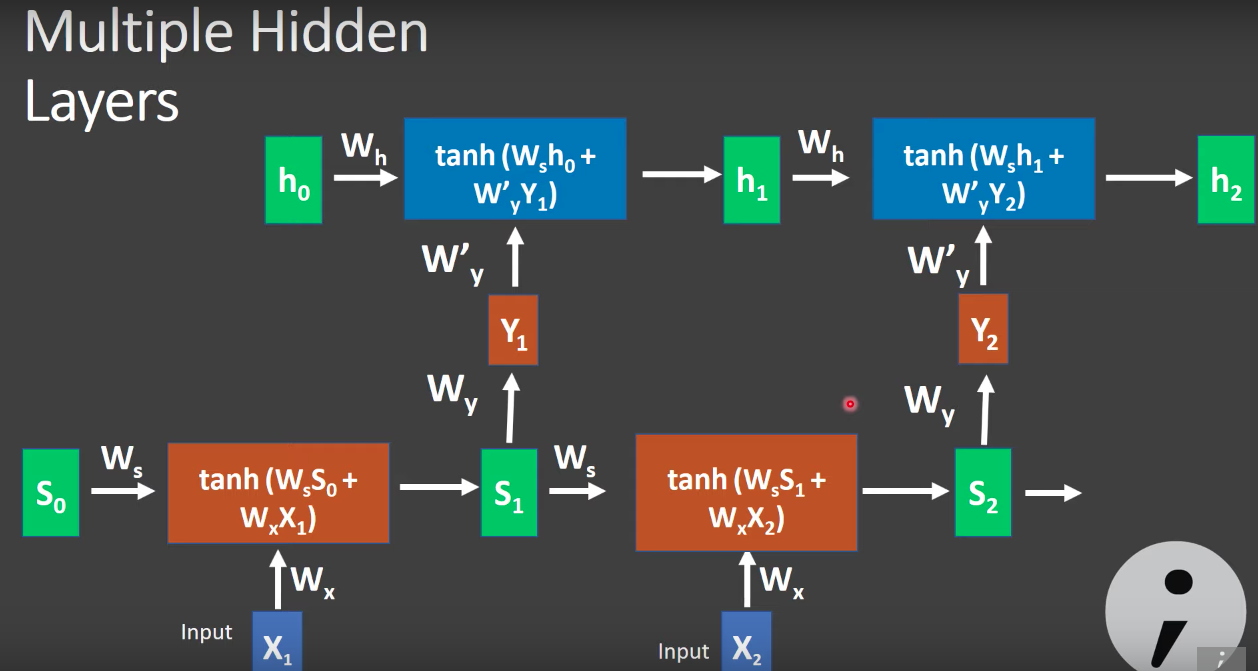

In [103]:
from keras.layers import LSTM,RNN

In [110]:
import tensorflow_datasets as tfds
encoder= tfds.features.text.TokenTextEncoder(word_index)

In [120]:
encoded_example= encoder.encode(X_train[1])

In [118]:
print(encoded_example)

[15, 2, 408, 92, 109, 9, 4, 32, 230, 32, 38, 7, 32, 5776, 204, 19, 930, 19, 2136, 587, 17, 207, 56, 12, 2, 48, 63, 2137]


In [166]:
model=Sequential()
model.add(Embedding(vocab_size,100))

In [167]:
model.add(LSTM(64))

In [168]:
for units in range(64,64):
    model.add(Dense(units,activation='relu'))
model.add(Dense(1,activation='sigmoid'))    

In [169]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


In [170]:
history=model.fit(padded, y_train, epochs=20, validation_data=(testing_paded, y_test))

/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5357 samples, validate on 596 samples
Epoch 1/20
5357/5357 [==============================] - 23s 4ms/step - loss: 0.3163 - accuracy: 0.8591 - val_loss: 0.1251 - val_accuracy: 0.9497
Epoch 2/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0661 - accuracy: 0.9787 - val_loss: 0.1326 - val_accuracy: 0.9446
Epoch 3/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0256 - accuracy: 0.9937 - val_loss: 0.1565 - val_accuracy: 0.9413
Epoch 4/20
5357/5357 [==============================] - 21s 4ms/step - loss: 0.0105 - accuracy: 0.9979 - val_loss: 0.1762 - val_accuracy: 0.9480
Epoch 5/20
5357/5357 [==============================] - 21s 4ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.1908 - val_accuracy: 0.9480
Epoch 6/20
5357/5357 [==============================] - 23s 4ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.2175 - val_accuracy: 0.9547
Epoch 7/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0019

In [171]:
eval_loss,eval_acc =model.evaluate(testing_paded, y_test)

596/596 [==============================] - 1s 900us/step


In [172]:
print("Eval_loss= {:.3f}, Eval_accuracy = {:.3f}".format(eval_loss,eval_acc))

Eval_loss= 0.197, Eval_accuracy = 0.945


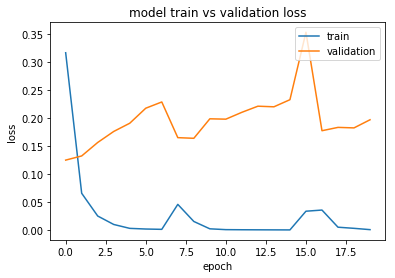

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Based on the default hyperparameters, we see that the loss is minimum at the beginning whereas it increases near epoch 15.The model shows that their might be an overfitting. Hence we can try using Dropout.

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

In [175]:
from keras.layers import Dropout


We add a new Dropout layer between the input (or visible layer) and the first hidden layer. The dropout rate is set to 20%, meaning one in 5 inputs will be randomly excluded from each update cycle.
Additionally, as recommended in the original paper on Dropout, a constraint is imposed on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3. This is done by setting the kernel_constraint argument on the Dense class when constructing the layers.

The learning rate was lifted by one order of magnitude, also recommended in the original Dropout paper.

Continuing on from the baseline example above, the code below exercises the same network with input dropout.

In [177]:
from keras.optimizers import Adam

adam= Adam(learning_rate=0.01)


In [212]:
model=Sequential()
model.add(Embedding(vocab_size,100))

In [213]:
model.add(LSTM(64))

In [214]:
for units in range(64,64):
    model.add(Dense(units,activation='relu'))
model.add(Dropout(0.2))    
model.add(Dense(1,activation='sigmoid'))    

In [215]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [217]:
history=model.fit(padded, y_train, epochs=20, validation_data=(testing_paded, y_test))

Train on 5357 samples, validate on 596 samples
Epoch 1/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.2098 - val_accuracy: 0.9312
Epoch 2/20
5357/5357 [==============================] - 23s 4ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.2047 - val_accuracy: 0.9513
Epoch 3/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.2006 - val_accuracy: 0.9530
Epoch 4/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.2211 - val_accuracy: 0.9547
Epoch 5/20
5357/5357 [==============================] - 22s 4ms/step - loss: 6.2661e-04 - accuracy: 1.0000 - val_loss: 0.2415 - val_accuracy: 0.9463
Epoch 6/20
5357/5357 [==============================] - 23s 4ms/step - loss: 2.7931e-04 - accuracy: 1.0000 - val_loss: 0.2694 - val_accuracy: 0.9446
Epoch 7/20
5357/5357 [==============================] - 22s 4ms/step - loss

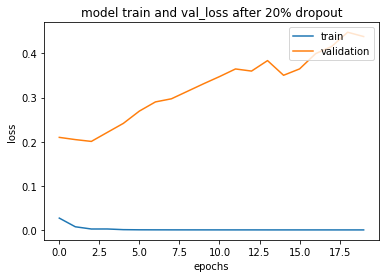

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train and val_loss after 20% dropout")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

As per the research we increased the learning rate now we will try to use the same default learning of 0.001.

In [219]:
adam= Adam(learning_rate=0.001)

In [220]:
model=Sequential()
model.add(Embedding(vocab_size,100))

In [221]:
model.add(LSTM(64))

In [222]:
for units in range(64,64):
    model.add(Dense(units,activation='relu'))
model.add(Dropout(0.2))    
model.add(Dense(1,activation='sigmoid'))    

In [223]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [224]:
history=model.fit(padded, y_train, epochs=20, validation_data=(testing_paded, y_test))

/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5357 samples, validate on 596 samples
Epoch 1/20
5357/5357 [==============================] - 25s 5ms/step - loss: 0.3122 - accuracy: 0.8663 - val_loss: 0.1405 - val_accuracy: 0.9581
Epoch 2/20
5357/5357 [==============================] - 23s 4ms/step - loss: 0.0691 - accuracy: 0.9772 - val_loss: 0.1609 - val_accuracy: 0.9329
Epoch 3/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0266 - accuracy: 0.9935 - val_loss: 0.1647 - val_accuracy: 0.9463
Epoch 4/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0078 - accuracy: 0.9987 - val_loss: 0.2111 - val_accuracy: 0.9513
Epoch 5/20
5357/5357 [==============================] - 21s 4ms/step - loss: 0.1333 - accuracy: 0.9606 - val_loss: 0.2029 - val_accuracy: 0.9295
Epoch 6/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0319 - accuracy: 0.9925 - val_loss: 0.2108 - val_accuracy: 0.9379
Epoch 7/20
5357/5357 [==============================] - 21s 4ms/step - loss: 0.0082

KeyboardInterrupt: 

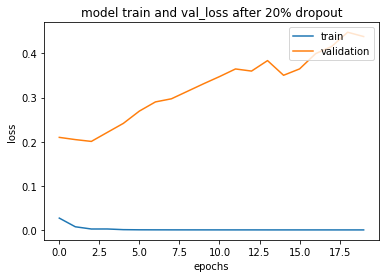

In [225]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train and val_loss after 20% dropout")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [232]:
adam= Adam(learning_rate=0.0001)

In [233]:
model=Sequential()
model.add(Embedding(vocab_size,100))

In [234]:
model.add(LSTM(64))

In [235]:
for units in range(64,64):
    model.add(Dense(units,activation='relu'))
model.add(Dropout(0.2))    
model.add(Dense(1,activation='sigmoid'))    

In [236]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [237]:
history=model.fit(padded, y_train, epochs=20, validation_data=(testing_paded, y_test))

/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/ankit/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5357 samples, validate on 596 samples
Epoch 1/20
5357/5357 [==============================] - 25s 5ms/step - loss: 0.3066 - accuracy: 0.8650 - val_loss: 0.1249 - val_accuracy: 0.9547
Epoch 2/20
5357/5357 [==============================] - 23s 4ms/step - loss: 0.0652 - accuracy: 0.9783 - val_loss: 0.1213 - val_accuracy: 0.9497
Epoch 3/20
5357/5357 [==============================] - 21s 4ms/step - loss: 0.0200 - accuracy: 0.9950 - val_loss: 0.1845 - val_accuracy: 0.9329
Epoch 4/20
5357/5357 [==============================] - 22s 4ms/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.2014 - val_accuracy: 0.9295
Epoch 5/20
5357/5357 [==============================] - 29s 5ms/step - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.1957 - val_accuracy: 0.9430
Epoch 6/20
5357/5357 [==============================] - 30s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9362
Epoch 7/20
5357/5357 [==============================] - 22s 4ms/step - loss: 9.2620

KeyboardInterrupt: 

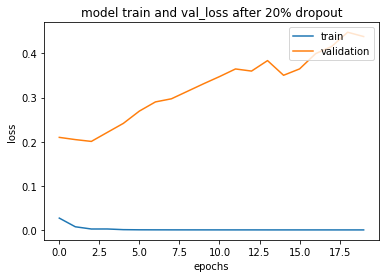

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train and val_loss after 20% dropout")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()